In [7]:
import mesa

# Data visualization tools.
import seaborn as sns

# Has multi-dimensional arrays and matrices. Has a large collection of
# mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

In [8]:
# update model so that the agent will check its wealth, and if it has money, give one unit of it away to another 
# random agent.

# The agent’s step method is called by the scheduler during each step of the model. To allow the agent to choose 
# another agent at random, we use the model.random random-number generator. 


# The model.schedule let's you get access to other agents

In [9]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        # Pass the parameters to the parent class.
        super().__init__(unique_id, model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def step(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.schedule.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1
                
class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N):
        self.num_agents = N
        # Create scheduler and assign it to the model
        self.schedule = mesa.time.RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            # Add the agent to the scheduler
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""

        # The model's step will go here for now this will call the step method of each agent and print the agent's unique_id
        self.schedule.step()


In [10]:
# Run model with 10 agents
model = MoneyModel(10)
for i in range(100):
    model.step()


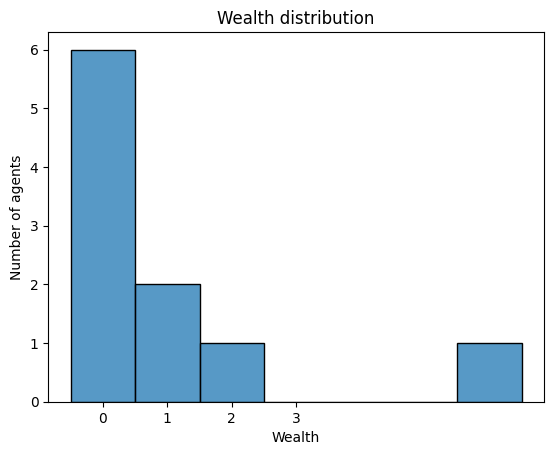

In [11]:
# now visualize wealth distribution
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
# Create a histogram with seaborn
ax = sns.histplot(agent_wealth, discrete=True)
ax.set(title="Wealth distribution", xlabel="Wealth", ylabel="Number of agents" );
ax.set_xticks(range(0,4), labels=range(0,4));